In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import *
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy of your model is = 86.16071343421936 %


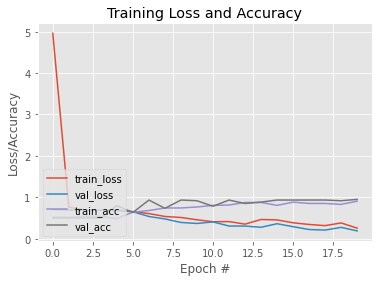

In [2]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

model.summary()

train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    
)

test_datagen=image.ImageDataGenerator(
    rescale=1./255,
)

train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    
)
print(train_generator.class_indices)

validation_generator=test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    
)
print(validation_generator.class_indices)

hist=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=2
)

h = hist.history
h.keys()
print("[INFO] saving covid detector model...")
model.save("covid_detector.model", save_format="h5")

# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h["loss"], label="train_loss")
plt.plot(np.arange(0, N), h["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), h["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), h["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

acc = model.evaluate_generator(generator= train_generator)[1] 

print(f"The accuracy of your model is = {acc*100} %")

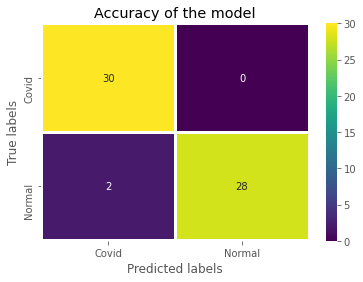

In [3]:
y_actual=[]
y_test=[]

for i in os.listdir('CovidDataset/Val/Normal'):
    img=image.load_img('CovidDataset/Val/Normal/'+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p = (model.predict(img) > 0).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(1)
    
    
for i in os.listdir('CovidDataset/Val/Covid'):
    img=image.load_img('CovidDataset/Val/Covid/'+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p = (model.predict(img) < 0).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(0)
    
y_actual=np.array(y_actual)
y_test=np.array(y_test)

cm=confusion_matrix(y_actual,y_test)

ax= plt.subplot()
sns.heatmap(cm,linewidths=2,cmap='viridis',annot=True,fmt='g',ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Accuracy of the model')
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);
plt.savefig("confusion matrix.png") 

In [1]:
import platform
print(platform.python_version ())

3.8.5
